# Titanic - Machine Learning from Disaster parte 2
## Vamos utilizar os dados disponíveis no Kaggle: https://www.kaggle.com/competitions/titanic
## - É um dataset de competição
## - O resultado é avaliado através da acurácia

## Refazendo todo processo feito no arquivo analise_titanic2

In [2]:
# Importando o pandas
import pandas as pd

# Visualizando a base de treino
treino = pd.read_csv('train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Visualizando a base de teste
teste = pd.read_csv('test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Refazendo os tratamentos 

In [4]:
# Eliminando alta cardinalidade
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

# Tratando média para substituir valores nulos de idade
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

# Tratando a coluna Embarked da base de treino usando a moda 
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

# Tratando a coluna Fare da base de teste usando a média
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

# Tratando a coluna "Sex" com lambda function
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)
treino

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck
0,1,0,3,male,22.000000,1,0,7.2500,S,1
1,2,1,1,female,38.000000,1,0,71.2833,C,0
2,3,1,3,female,26.000000,0,0,7.9250,S,0
3,4,1,1,female,35.000000,1,0,53.1000,S,0
4,5,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,1
887,888,1,1,female,19.000000,0,0,30.0000,S,0
888,889,0,3,female,29.699118,1,2,23.4500,S,0
889,890,1,1,male,26.000000,0,0,30.0000,C,1


In [5]:
teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck
0,892,3,male,34.50000,0,0,7.8292,Q,1
1,893,3,female,47.00000,1,0,7.0000,S,0
2,894,2,male,62.00000,0,0,9.6875,Q,1
3,895,3,male,27.00000,0,0,8.6625,S,1
4,896,3,female,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,1
414,1306,1,female,39.00000,0,0,108.9000,C,0
415,1307,3,male,38.50000,0,0,7.2500,S,1
416,1308,3,male,30.27259,0,0,8.0500,S,1


In [6]:
# Utilizando OnHotEnconder e fazendo o fit com os dados
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')
ohe = ohe.fit(treino[['Embarked']])

# Atualizando a base de treino 
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
treino = pd.concat([treino,ohe_df],axis=1)

# Base de teste
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
teste = pd.concat([teste,ohe_df],axis=1)

# Apagando colunas já tratadas
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,1,0,0


In [7]:
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,1,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,1,0
3,895,3,27.00000,0,0,8.6625,1,0,0,1
4,896,3,22.00000,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,0,1


## Analisando os dados

### Ananlisando Outliers

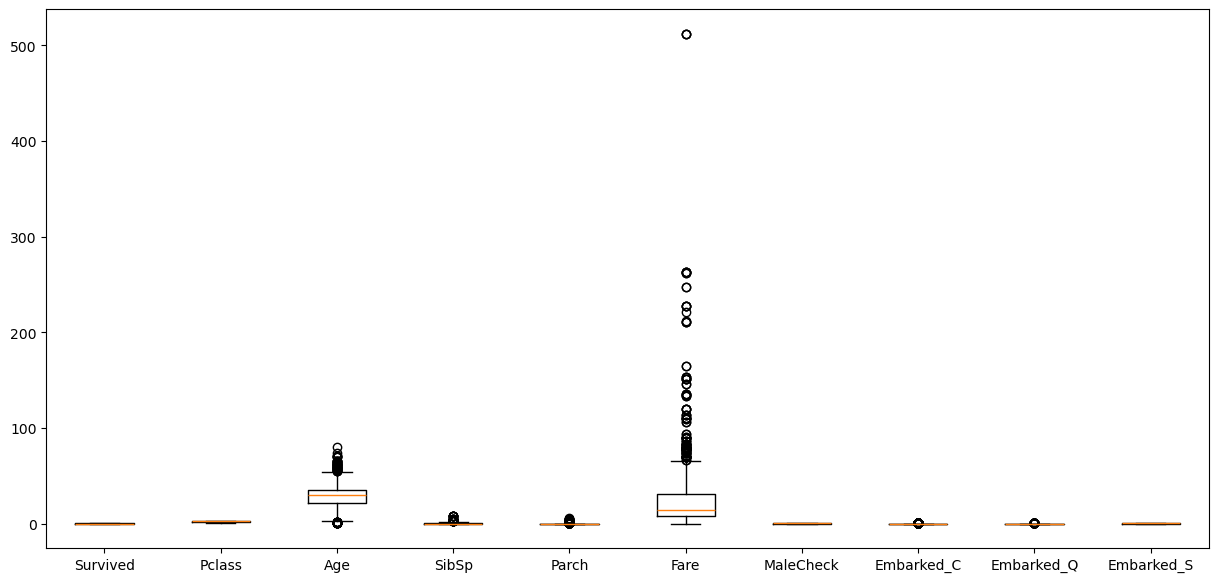

In [8]:
# Visualização da escala dos dados
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()

- outliers detectados em 'Fare' e 'Age'

In [9]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

# Criando o scaler
transformer = RobustScaler().fit(treino[['Age','Fare']])

# Transformando os dados
treino[['Age', 'Fare']] = transformer.transform(treino[['Age','Fare']])
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0


In [10]:
# Base teste
# Criando o scaler
transformer = RobustScaler().fit(teste[['Age','Fare']])

# Transformando os dados
teste[['Age', 'Fare']] = transformer.transform(teste[['Age','Fare']])
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.331562,0,0,-0.280670,1,0,1,0
1,893,3,1.311954,1,0,-0.315800,0,0,0,1
2,894,2,2.488424,0,0,-0.201943,1,0,1,0
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1
414,1306,1,0.684503,0,0,4.001229,0,1,0,0
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1


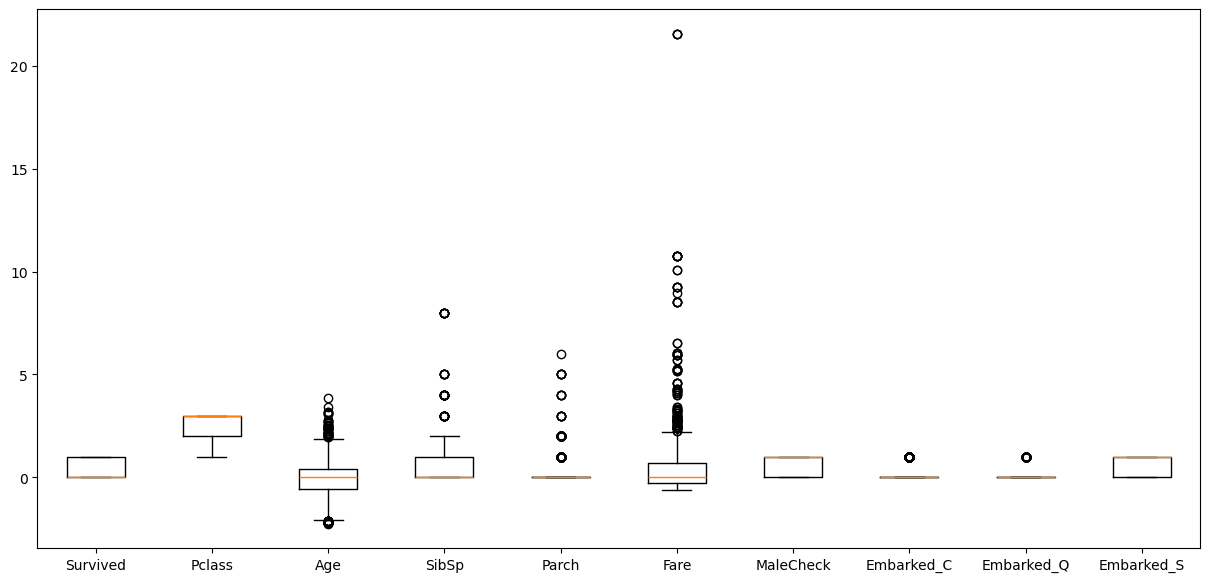

In [11]:
# Visualização nova
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()

### Analisando as colunas SibSp e Parch

- SibSp = Nº de irmãos/conjuges a bordo
- Parch = Nº de pais/filhos a bordo

In [12]:
# Sobrevivencia para SibSp
SibSp_df =  treino.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
SibSp_df.columns = ['SibSp', 'sobreviventes', 'total', 'taxa_sobrevivencia']
SibSp_df 

,SibSp,sobreviventes,total,taxa_sobrevivencia
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [13]:
# Sobrevivencia para Parch
Parch_df =  treino.groupby('Parch')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Parch_df.columns = ['Parch', 'sobreviventes', 'total', 'taxa_sobrevivencia']
Parch_df 

,Parch,sobreviventes,total,taxa_sobrevivencia
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


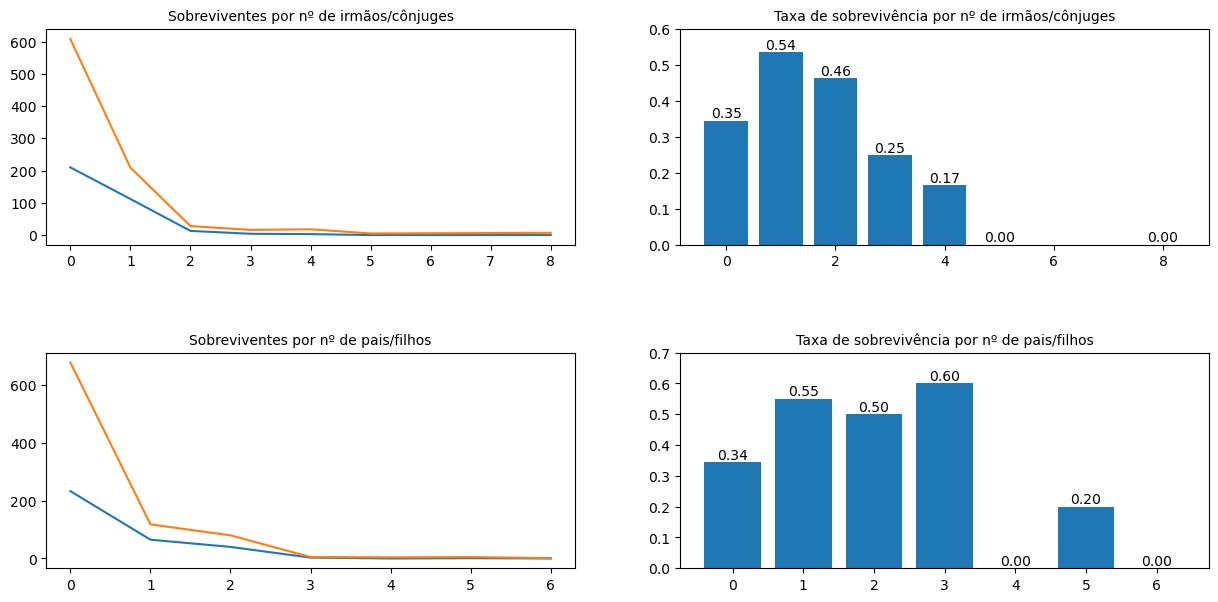

In [14]:
# Visualização gráfica
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,7))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobreviventes)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('Sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.taxa_sobrevivencia)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('Taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobreviventes)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('Sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.taxa_sobrevivencia)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('Taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

- Passageiros que viajaram sozinhos tiveram menor taxa de sobrevivência

### Criação Coluna 'Alone' 

In [15]:
def alone(x, y):
    if (x == 0 and y == 0):
        return 1
    else:
        return 0

In [16]:
# Aplicando na base de treinos
treino['Alone'] = treino.apply(lambda x: alone(x.SibSp, x.Parch), axis=1)

# Verificação
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1,1
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1,1
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1,0
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0,1


In [17]:
# Aplicando na base de teste
teste['Alone'] = teste.apply(lambda x: alone(x.SibSp, x.Parch), axis=1)

# Verificação
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone
0,892,3,0.331562,0,0,-0.280670,1,0,1,0,1
1,893,3,1.311954,1,0,-0.315800,0,0,0,1,0
2,894,2,2.488424,0,0,-0.201943,1,0,1,0,1
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1,1
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1,1
414,1306,1,0.684503,0,0,4.001229,0,1,0,0,1
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1,1
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1,1


### Criação da coluna 'Fam_membs' = Family members

In [18]:
# Criação na base de treino
treino['Fam_memb'] = treino.SibSp + treino.Parch

#Verificação
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Fam_memb
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1,1,0
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1,1,0
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1,0,3
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0,1,0


In [19]:
# Criação na base de teste
teste['Fam_memb'] = teste.SibSp + teste.Parch

#Verificação
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Fam_memb
0,892,3,0.331562,0,0,-0.280670,1,0,1,0,1,0
1,893,3,1.311954,1,0,-0.315800,0,0,0,1,0,1
2,894,2,2.488424,0,0,-0.201943,1,0,1,0,1,0
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1,1,0
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1,1,0
414,1306,1,0.684503,0,0,4.001229,0,1,0,0,1,0
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1,1,0
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1,1,0


In [20]:
# Verificando Sobrevivência por familiar
Fam_memb_df = treino.groupby('Fam_memb')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Fam_memb_df.columns = ['Fam_memb', 'sobreviventes', 'total', 'taxa_sobrevivencia']
Fam_memb_df 

,Fam_memb,sobreviventes,total,taxa_sobrevivencia
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


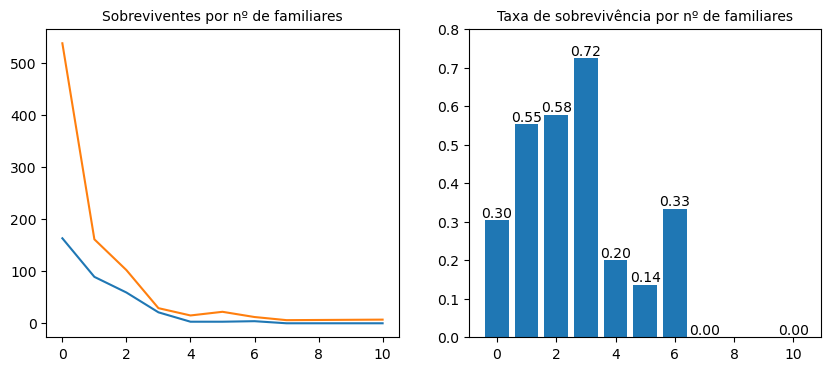

In [21]:
# Visualização gráfica
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

ax[0].plot(Fam_memb_df.Fam_memb, Fam_memb_df.sobreviventes)
ax[0].plot(Fam_memb_df.Fam_memb, Fam_memb_df.total)
ax[0].set_title('Sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Fam_memb_df.Fam_memb, Fam_memb_df.taxa_sobrevivencia)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('Taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

### Seleção de recursos: melhores variáveis para analise

In [23]:
# Correlação entre variaveis
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Fam_memb
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
MaleCheck,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


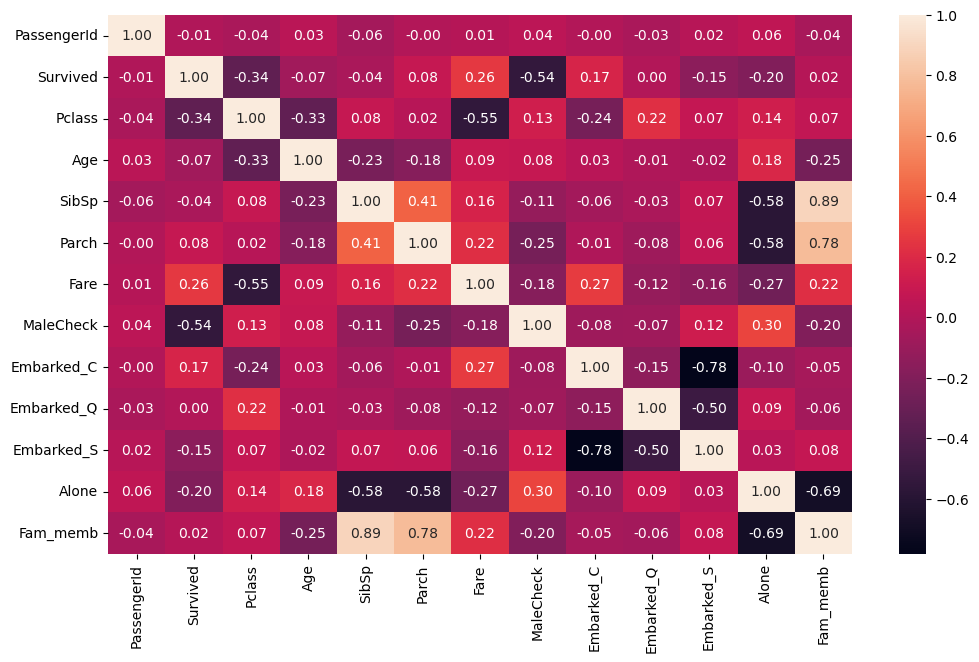

In [25]:
# Visualização em heatmap
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

#### Relação entre Pclass e Fare

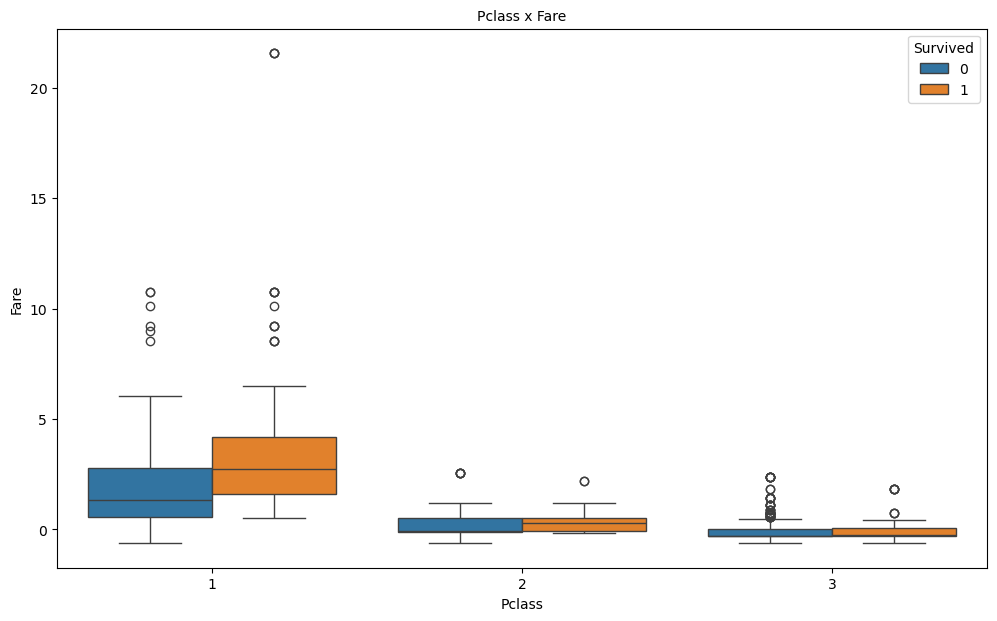

In [27]:
# Visualizando a relação entre Pclass e Fare
fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(data=treino,x='Pclass',y='Fare',hue='Survived')
ax.set_title('Pclass x Fare', fontsize=10)

plt.show()

In [28]:
# taxa de sobrevivencia nas classes
treino.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [30]:
# Pclass x Fare
treino.groupby(['Pclass', 'Survived'])['Fare'].agg(['min', 'mean', 'max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

- *Porque classes diferentes tem o mesmo preço?*

Se você conseguiu economizar e guardar todo o seu dinheiro para uma viagem para mudar sua vida e ir para a América, você é uma terceira classe, um imigrante que precisa trazer sua própria comida a bordo e ter em mente como suas provisões se sustentariam. A segunda classe era formada por trabalhadores de colarinho branco que podiam se dar ao luxo de viajar com um pouco de lazer, sem se preocupar com algo tão comum como comida. Primeira classe significa que você nasceu com dinheiro e não precisa sujar as mãos com o trabalho. Eles não eram separados apenas pelo custo, eles também eram separados por onde poderiam ir e o que recebiam.

- Link do Reddit que também fala sobre: https://www.reddit.com/r/AskHistorians/comments/11dlsn6/why_was_the_cost_of_tickets_on_the_titanic_so/?onetap_auto=true

#### Relação entre as colunas de embarque

- O Titanic deixou o porto de Southampton...Em seguida ele foi para Cherbourg-Octeville na França...em sua maioria da primeira classe.O Titanic então rumou para Queenstown na Irlanda...principalmente imigrantes da terceira classe que pretendiam tentar a vida nos Estados Unidos.
- Assim, percebe-se a relação. A ordem do porto influencia a classe do passageiro.

In [36]:
# Nova importação da base
treino2 = pd.read_csv('train.csv')
teste2 = pd.read_csv('test.csv')
treino2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
#tratamento dos dados vazios
treino2['Embarked'] = treino2['Embarked'].fillna('S')

In [38]:
# Colocar ordem dos portos: S, C e Q
from sklearn.preprocessing import OrdinalEncoder

# Criando o encoder
categorias = ['S','C','Q']
enc = OrdinalEncoder(categories=[categorias],dtype='int32')

# Fazendo o fit com os dados
enc = enc.fit(treino2[['Embarked']])

# Adição da coluna na base de treino original
treino['Embarked'] = enc.transform(treino2[['Embarked']])

# Fit com os dados de teste
enc = enc.fit(teste2[['Embarked']])

# Adição na base de teste original
teste['Embarked'] = enc.transform(teste2[['Embarked']])

# eliminação das colunas desnecessárias
treino = treino.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,1,0,3,-0.592240,1,0,-0.312011,1,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,0,1,1
2,3,1,3,-0.284548,0,0,-0.282777,0,1,0,0
3,4,1,1,0.407760,1,0,1.673732,0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,1,0,0
887,888,1,1,-0.823009,0,0,0.673281,0,1,0,0
888,889,0,3,0.000000,1,2,0.389604,0,0,3,0
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,1


In [39]:
# eliminação das colunas desnecessárias
teste = teste.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,892,3,0.331562,0,0,-0.280670,1,1,0,2
1,893,3,1.311954,1,0,-0.315800,0,0,1,0
2,894,2,2.488424,0,0,-0.201943,1,1,0,2
3,895,3,-0.256674,0,0,-0.245367,1,1,0,0
4,896,3,-0.648831,1,1,-0.091793,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,1,0,0
414,1306,1,0.684503,0,0,4.001229,0,1,0,1
415,1307,3,0.645287,0,0,-0.305208,1,1,0,0
416,1308,3,0.000000,0,0,-0.271316,1,1,0,0


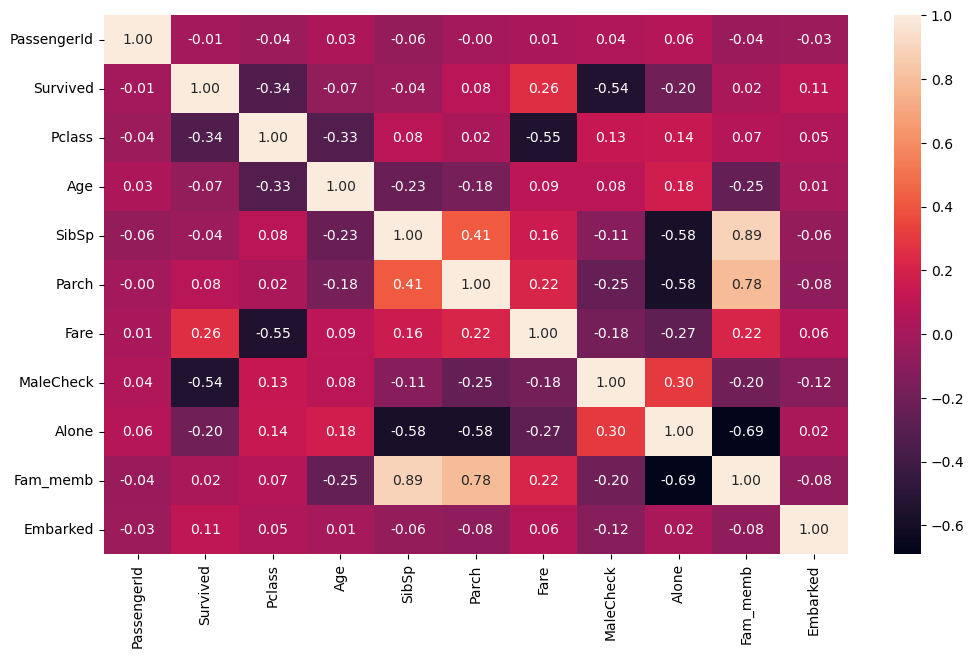

In [41]:
# Novo Heatmap
fig, ax = plt.subplots(figsize=(12,7))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")
plt.show()

#### Relação entre as colunas de família

In [43]:
# Separando X e Y
X = treino.drop(['PassengerId', 'Survived'], axis=1)
Y = treino.Survived

In [44]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,Y)

# Verificando importância das colunas
clf_rl.coef_[0]

array([-1.03263042, -0.49652852, -0.26762379,  0.0163412 ,  0.04436238,
       -2.53517931, -0.73082523, -0.25128259,  0.23859331])

In [51]:
# Árvore de Classificação
from sklearn import tree
clf_ac = tree.DecisionTreeClassifier(random_state=42).fit(X,Y)

# Verificando a importância das colunas
clf_ac.feature_importances_

array([0.10901775, 0.22826711, 0.01907221, 0.0272942 , 0.23870173,
       0.30933519, 0.00397775, 0.04365035, 0.02068372])

In [46]:
# Criação de DataFrame
importancia = pd.DataFrame({
    'colunas': X.columns,
    'Reg. Log.': clf_rl.coef_[0],
    'Arv. Clas.': clf_ac.feature_importances_
})

importancia

,colunas,Reg. Log.,Arv. Clas.
0,Pclass,-1.032630,0.109018
1,Age,-0.496529,0.228267
2,SibSp,-0.267624,0.019072
3,Parch,0.016341,0.027294
4,Fare,0.044362,0.238702
5,MaleCheck,-2.535179,0.309335
6,Alone,-0.730825,0.003978
7,Fam_memb,-0.251283,0.043650
8,Embarked,0.238593,0.020684


In [ ]:
# Eliminção das colunas mais irrelevantes
treino = treino.drop(['SibSp', 'Parch'], axis=1)
teste = teste.drop(['SibSp', 'Parch'], axis=1)

## Nova Base de dados

In [49]:
treino

,PassengerId,Survived,Pclass,Age,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,1,0,3,-0.592240,-0.312011,1,0,1,0
1,2,1,1,0.638529,2.461242,0,0,1,1
2,3,1,3,-0.284548,-0.282777,0,1,0,0
3,4,1,1,0.407760,1.673732,0,0,1,0
4,5,0,3,0.407760,-0.277363,1,1,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,-0.062981,1,1,0,0
887,888,1,1,-0.823009,0.673281,0,1,0,0
888,889,0,3,0.000000,0.389604,0,0,3,0
889,890,1,1,-0.284548,0.673281,1,1,0,1


In [50]:
teste

,PassengerId,Pclass,Age,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,892,3,0.331562,-0.280670,1,1,0,2
1,893,3,1.311954,-0.315800,0,0,1,0
2,894,2,2.488424,-0.201943,1,1,0,2
3,895,3,-0.256674,-0.245367,1,1,0,0
4,896,3,-0.648831,-0.091793,0,0,2,0
...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,-0.271316,1,1,0,0
414,1306,1,0.684503,4.001229,0,1,0,1
415,1307,3,0.645287,-0.305208,1,1,0,0
416,1308,3,0.000000,-0.271316,1,1,0,0


## Avaliação dos modelos 

- Separar em treino e validação

In [54]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
Y = treino.Survived

# Separando em treino e validação
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

### Árvore de Classificação

In [62]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,Y_train)

# Fazendo a previsão
Y_previsao_ac = clf_ac.predict(X_val)
Y_previsao_ac

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,Y_train)

# Fazendo a previsão
Y_previsao_knn = clf_knn.predict(X_val)
Y_previsao_knn

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

### Regressão Logística

In [64]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,Y_train)

# Fazendo a previsão
Y_previsao_rl = clf_rl.predict(X_val)
Y_previsao_rl

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

### Avaliando acurácia

In [65]:
from sklearn.metrics import accuracy_score

as_ac = accuracy_score(Y_val, Y_previsao_ac) # Para a árvore
as_knn = accuracy_score(Y_val, Y_previsao_knn) # Para KNN
as_rl = accuracy_score(Y_val, Y_previsao_rl) # Para regressão logística
as_ac, as_knn, as_rl

(0.7627118644067796, 0.7864406779661017, 0.8101694915254237)

### Matriz de confusão

In [66]:
from sklearn.metrics import confusion_matrix
# Para a árvore
confusion_matrix(Y_val, Y_previsao_ac)

array([[142,  33],
       [ 37,  83]], dtype=int64)

In [67]:
# Para o knn
confusion_matrix(Y_val, Y_previsao_knn)

array([[149,  26],
       [ 37,  83]], dtype=int64)

In [68]:
# Para a regressão logística
confusion_matrix(Y_val, Y_previsao_rl)

array([[154,  21],
       [ 35,  85]], dtype=int64)

## Previsão na base de teste

In [69]:
X_train

,Pclass,Age,Fare,MaleCheck,Alone,Fam_memb,Embarked
6,1,1.869299,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.361471,1.174771,1,0,3,1
73,3,-0.284548,0.000000,1,0,1,1
882,3,-0.592240,-0.170531,0,1,0,0
...,...,...,...,...,...,...,...
106,3,-0.669163,-0.294687,0,1,0,0
270,1,0.000000,0.716591,1,1,0,0
860,3,0.869299,-0.014981,1,0,2,0
435,1,-1.207624,4.571140,0,0,3,0


In [70]:
teste

,PassengerId,Pclass,Age,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,892,3,0.331562,-0.280670,1,1,0,2
1,893,3,1.311954,-0.315800,0,0,1,0
2,894,2,2.488424,-0.201943,1,1,0,2
3,895,3,-0.256674,-0.245367,1,1,0,0
4,896,3,-0.648831,-0.091793,0,0,2,0
...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,-0.271316,1,1,0,0
414,1306,1,0.684503,4.001229,0,1,0,1
415,1307,3,0.645287,-0.305208,1,1,0,0
416,1308,3,0.000000,-0.271316,1,1,0,0


In [71]:
# Para ser igual a base de treino, eliminar PassengerId
X_teste = teste.drop('PassengerId',axis=1)
X_teste

,Pclass,Age,Fare,MaleCheck,Alone,Fam_memb,Embarked
0,3,0.331562,-0.280670,1,1,0,2
1,3,1.311954,-0.315800,0,0,1,0
2,2,2.488424,-0.201943,1,1,0,2
3,3,-0.256674,-0.245367,1,1,0,0
4,3,-0.648831,-0.091793,0,0,2,0
...,...,...,...,...,...,...,...
413,3,0.000000,-0.271316,1,1,0,0
414,1,0.684503,4.001229,0,1,0,1
415,3,0.645287,-0.305208,1,1,0,0
416,3,0.000000,-0.271316,1,1,0,0


In [72]:
# Regressão logística na base de teste
y_previsao = clf_rl.predict(X_teste)
y_previsao

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Criando coluna com a pr